# Problem Statment: 
### Build a machine learning model to predict whether a Titanic passenger survived based on their demographic and travel-related features.

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Load Datasets

In [2]:
train_df = pd.read_csv("Dataset/TitanicTrain.csv")
test_df = pd.read_csv("Dataset/TitanicTest.csv")

print(f'Training Data Size:{train_df.shape}')
print(f'Testing Data Size:{test_df.shape}')

Training Data Size:(891, 12)
Testing Data Size:(418, 11)


In [3]:
print(train_df.info())
print('----'*20)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------

In [4]:
full_df = pd.concat([train_df, test_df], axis=0)

# EDA (Exploratory Data Analysis)

## Basic Checks

In [5]:
full_df.shape

(1309, 12)

In [6]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
full_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
full_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Visualization

In [9]:
# Seprating Continuous & Categorical data  

df_num = full_df.select_dtypes(include=[np.number])
df_cat = full_df.select_dtypes(exclude=[np.number]) 

print(f'These are the Numerical Columns: \n {df_num.columns}')
print("----"*20)
print(f'These are the Categorical Columns: \n {df_cat.columns}')

These are the Numerical Columns: 
 Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
--------------------------------------------------------------------------------
These are the Categorical Columns: 
 Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


- Histogram
- Countplot
- Boxplot
- Heatmap
- Scatterplot 

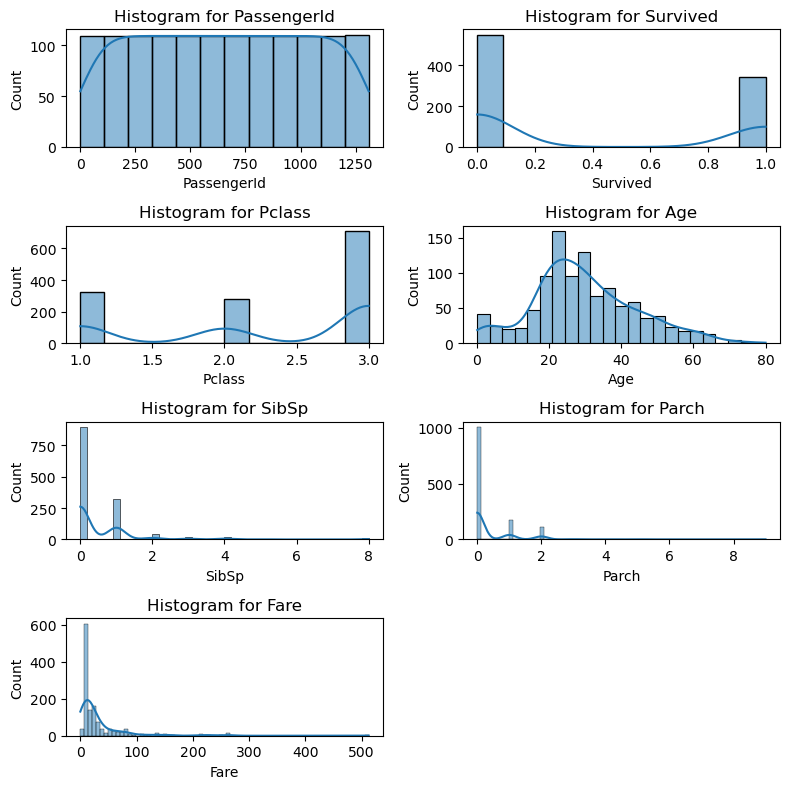

In [10]:
# Histogram 
plt.figure(figsize=(8, 8))
for idx, col in enumerate(df_num.columns):
    plt.subplot(4, (len(df_num.columns)//4)+1, idx+1)
    sns.histplot(full_df[col], kde=True)
    plt.title(f'Histogram for {col}')
plt.tight_layout()
plt.show()

In [11]:
full_df = full_df.reset_index(drop=True)

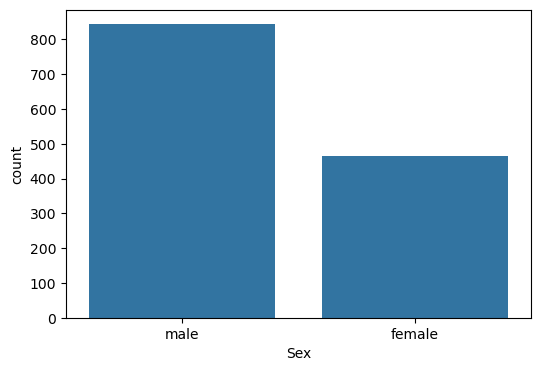

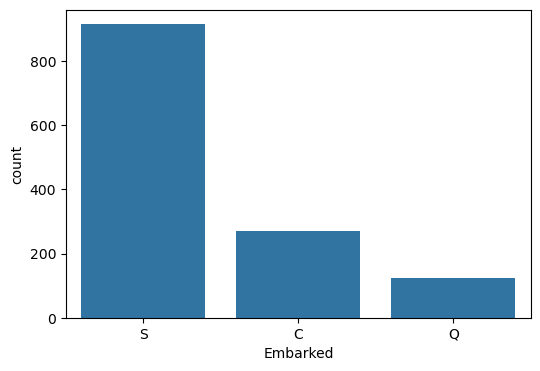

In [12]:
# Countplot
cat = ['Sex', 'Embarked']

for col in cat:
    plt.figure(figsize=(6,4))
    sns.countplot(data=full_df, x=col)
    plt.show()

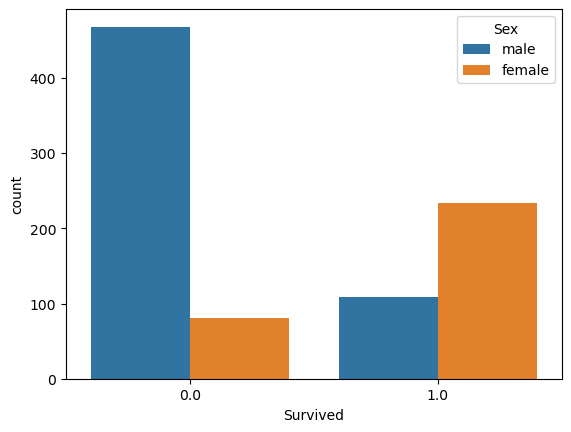

In [13]:
sns.countplot(x=full_df['Survived'], hue=full_df['Sex'])
plt.show()

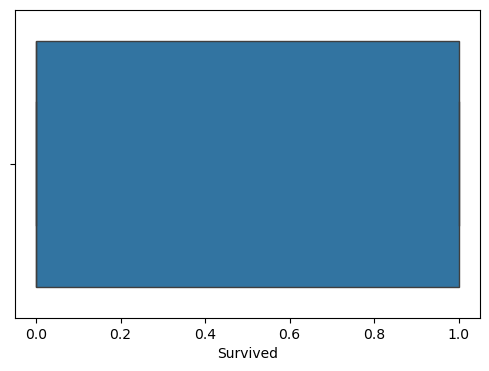

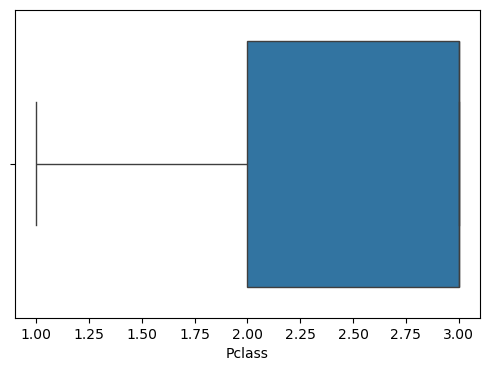

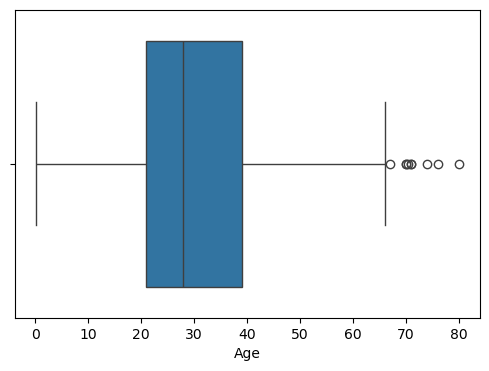

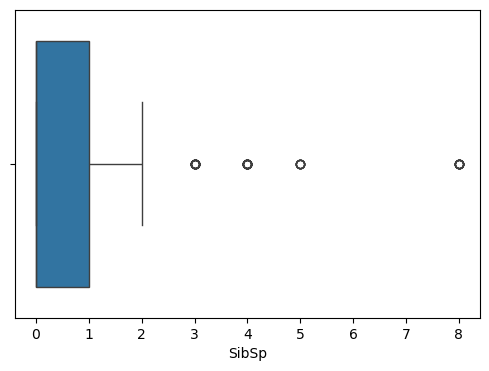

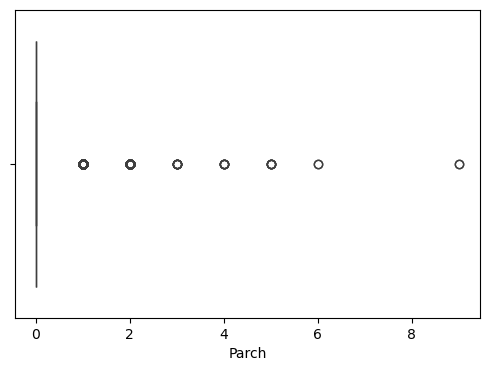

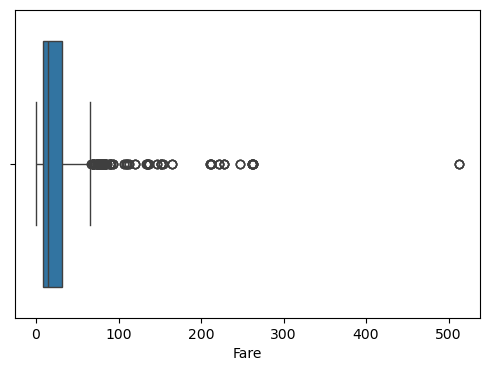

In [14]:
# Boxplot 
cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

for col in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=full_df[col])
    plt.show()

<Axes: >

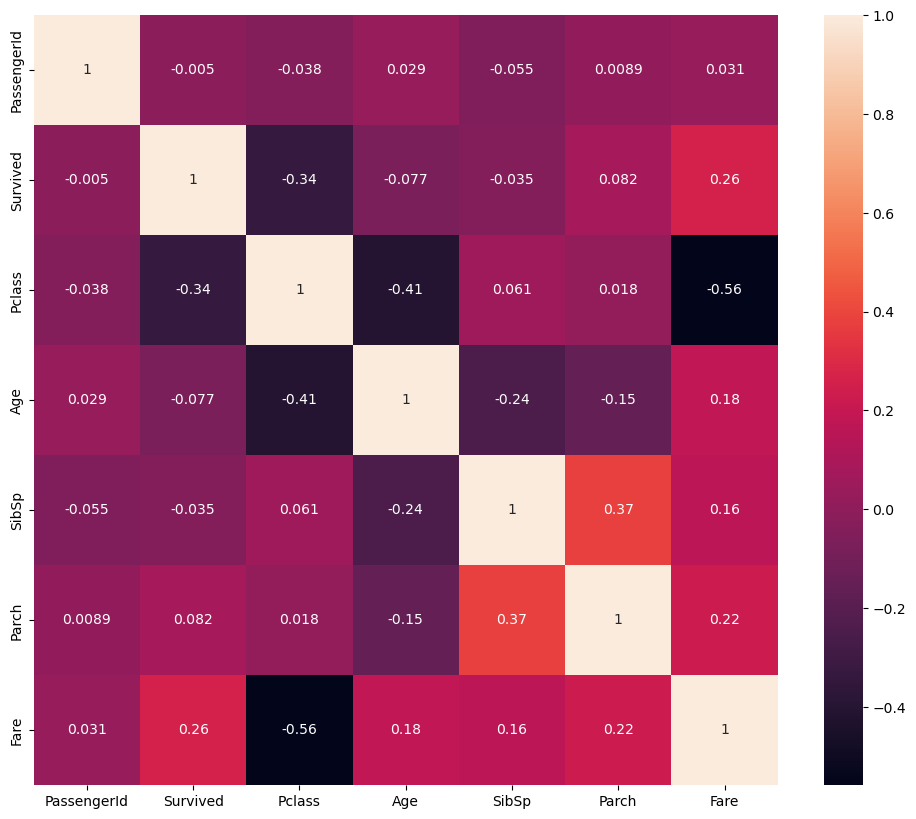

In [15]:
# Heat-map

plt.figure(figsize=(12,10))
sns.heatmap(full_df.corr(numeric_only=True),annot=True)

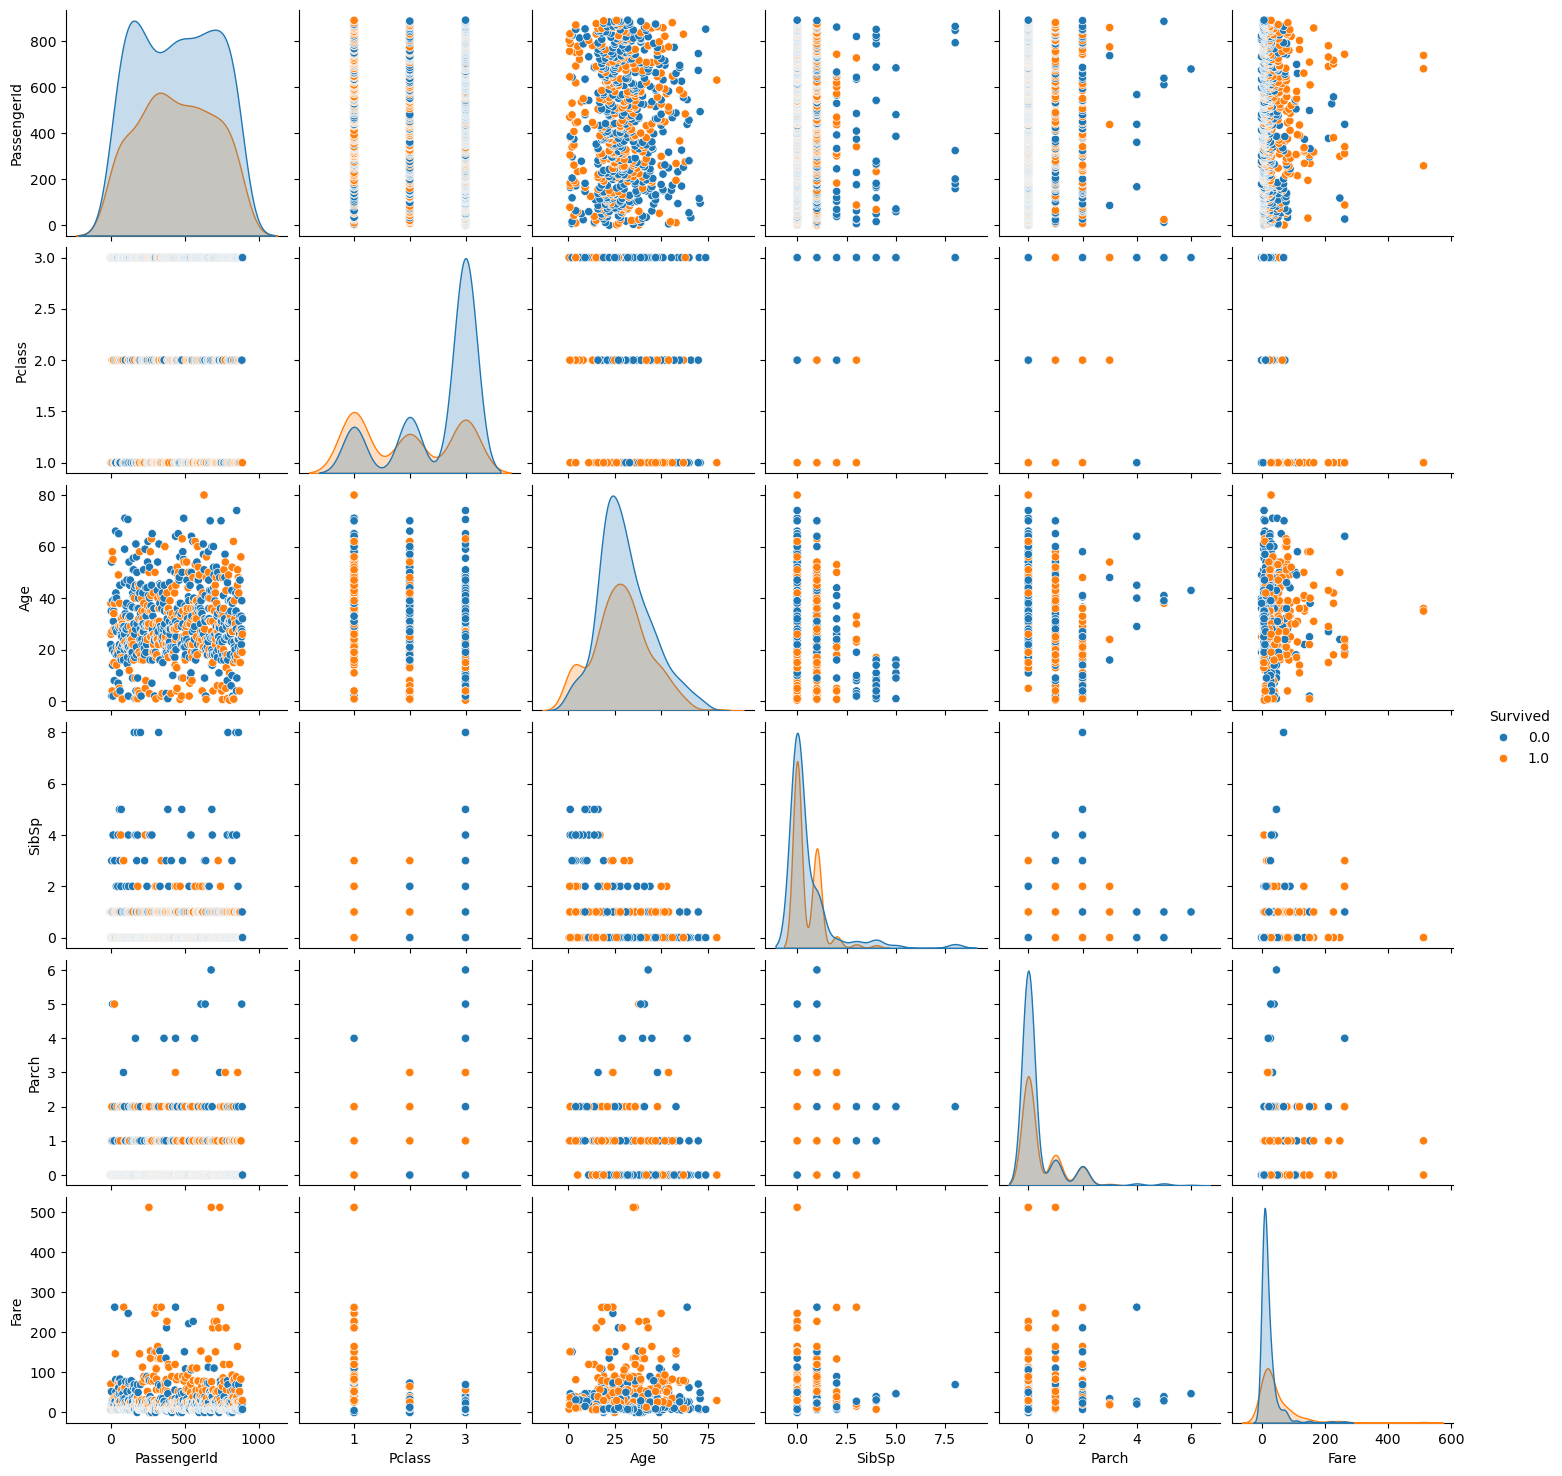

In [16]:
#Scatter-Plot

sns.pairplot(full_df,hue="Survived")

### Overall EDA Summary

- The dataset contains skewed distributions, outliers, and missing values, but no critical data quality issues.
- Survival is strongly influenced by Sex, Pclass, Age, Fare, and FamilySize.
- Feature engineering is expected to have a greater impact on model performance than using complex algorithms alone.

- **Conclusion** : A structured preprocessing and feature engineering strategy is essential before model training.

In [17]:
full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning, Feature Engineering and Preprocessing

In [18]:
## Filling Age using median grouped by Sex and Pclass
full_df['Age'] = full_df.groupby(['Sex', 'Pclass'])['Age'].transform(
    lambda x: x.fillna(x.median())
)

In [19]:
#Filling Fare missing values using median
full_df['Fare'] = full_df['Fare'].fillna(full_df['Fare'].median())

In [20]:
#Filling Embarked missing values using mode
full_df['Embarked'] = full_df['Embarked'].fillna(full_df['Embarked'].mode()[0])

In [21]:
# =========================================
#  Feature Engineering
# =========================================

full_df['Title'] = full_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Group rare titles
full_df['Title'] = full_df['Title'].replace(
    ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],
    'Rare'
)

# Normalize similar titles
full_df['Title'] = full_df['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})

In [22]:
full_df['FamilySize'] = full_df['SibSp'] + full_df['Parch'] + 1
full_df['IsAlone'] = (full_df['FamilySize'] == 1).astype(int)


In [23]:
# Age Binning
full_df['AgeBin'] = pd.cut(
    full_df['Age'],
    bins=[0, 12, 20, 40, 60, 80],
    labels=[0, 1, 2, 3, 4]
)

In [24]:
# Fare Binning
full_df['FareBin'] = pd.qcut(
    full_df['Fare'],
    4,
    labels=[0, 1, 2, 3]
)

In [25]:
# =========================================
# Drop Unnecessary Columns
# =========================================
full_df.drop(
    columns=['Name', 'Ticket', 'Cabin', 'Age', 'Fare'],
    inplace=True
)

In [26]:
# =========================================
# Encode Categorical Variables
# =========================================
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Sex', 'Embarked', 'Title']:
    full_df[col] = le.fit_transform(full_df[col])

In [27]:
# =========================================
# Split Back into Train and Test Sets
# =========================================
train_clean = full_df.iloc[:len(train_df)]
test_clean  = full_df.iloc[len(train_df):]

X = train_clean.drop('Survived', axis=1)
y = train_clean['Survived']

X_test_final = test_clean.drop('Survived', axis=1)

In [28]:
print("Final Features Used for Modeling:")
print(X.columns.tolist())

Final Features Used for Modeling:
['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'FamilySize', 'IsAlone', 'AgeBin', 'FareBin']


In [29]:
full_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,FamilySize,IsAlone,AgeBin,FareBin
0,1,0.0,3,1,1,0,2,2,2,0,2,0
1,2,1.0,1,0,1,0,0,3,2,0,2,3
2,3,1.0,3,0,0,0,2,1,1,1,2,1
3,4,1.0,1,0,1,0,2,3,2,0,2,3
4,5,0.0,3,1,0,0,2,2,1,1,2,1


In [30]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Sex          1309 non-null   int64   
 4   SibSp        1309 non-null   int64   
 5   Parch        1309 non-null   int64   
 6   Embarked     1309 non-null   int64   
 7   Title        1309 non-null   int64   
 8   FamilySize   1309 non-null   int64   
 9   IsAlone      1309 non-null   int64   
 10  AgeBin       1309 non-null   category
 11  FareBin      1309 non-null   category
dtypes: category(2), float64(1), int64(9)
memory usage: 105.4 KB


In [31]:
print(full_df.duplicated().sum())

0


# Model Training

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
rf = RandomForestClassifier(
    n_estimators=600,  #600
    max_features='sqrt',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)

In [34]:
rf.fit(X_train, y_train)

,n_estimators,600
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
gb = GradientBoostingClassifier(
    n_estimators=700,  #300,
    learning_rate=0.05, #0.05
    max_depth=7,
    random_state=42)

In [36]:
gb.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,700
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,7
,min_impurity_decrease,0.0
,init,None


In [37]:
# Logistic Regression with scaling
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(C=10,max_iter=1200))
])

In [38]:
lr_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,10


In [39]:
rf_pred = rf.predict_proba(X_test)[:, 1]
gb_pred = gb.predict_proba(X_test)[:, 1]
lr_pred = lr_pipeline.predict_proba(X_test)[:, 1]

In [40]:
final_pred = (
    0.45 * rf_pred +
    0.3 * gb_pred +
    0.25 * lr_pred
)

final_pred = (final_pred >= 0.5).astype(int)

In [41]:
accuracy_score(y_test, final_pred)

0.8432835820895522

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, final_pred)

In [43]:
auc_score = roc_auc_score(y_test, final_pred)
print("ROC AUC Score:", auc_score)

ROC AUC Score: 0.8266483043553108


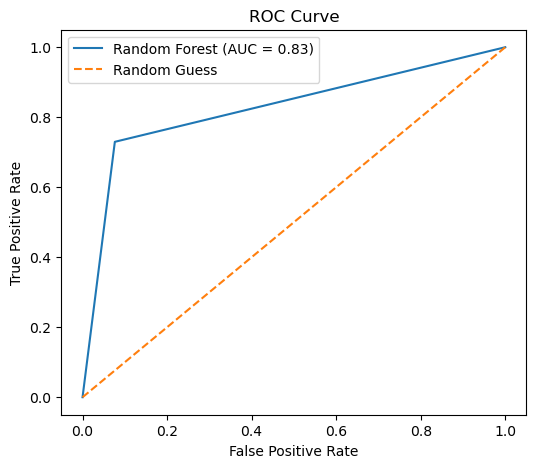

In [44]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

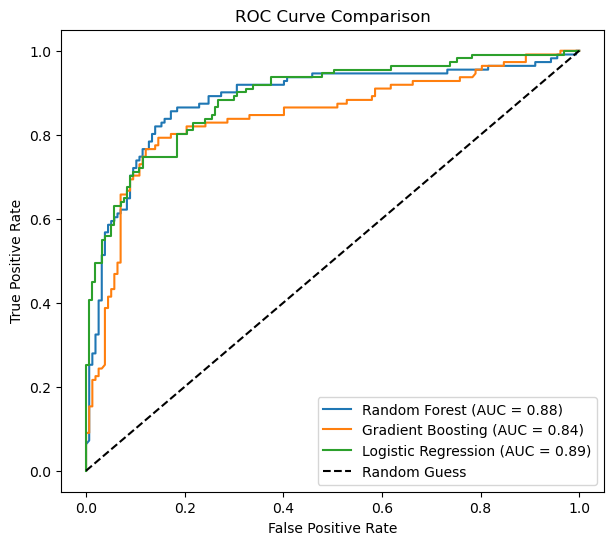

In [45]:
models = {
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "Logistic Regression": lr_pipeline
}

plt.figure(figsize=(7,6))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0,1],[0,1],'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# Training on Full Dataset

In [46]:
train_clean = full_df[:len(train_df)]
test_clean  = full_df[len(train_df):]

X = train_clean.drop('Survived', axis=1)
y = train_clean['Survived']

X_test_final = test_clean.drop('Survived', axis=1)

In [47]:
rf.fit(X, y)
gb.fit(X, y)
lr_pipeline.fit(X, y)

,steps,"[('scaler', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,10


In [48]:
rf_pred = rf.predict_proba(X_test_final)[:, 1]
gb_pred = gb.predict_proba(X_test_final)[:, 1]
lr_pred = lr_pipeline.predict_proba(X_test_final)[:, 1]

In [49]:
final_pred = (
    0.45 * rf_pred +
    0.3 * gb_pred +
    0.25 * lr_pred
)

final_pred = (final_pred >= 0.5).astype(int)

In [ ]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': final_pred
})

submission.unique()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
